<a href="https://colab.research.google.com/github/danieldrako/Fundamentos-Procesamiento-Lenguaje-Natural-Python-NLTK/blob/main/04statistics_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuración inicial

* En este notebook vamos a descargar el dataset `book` que contiene muchos libros en ingles en formato de texto tokenizado, de los cuales vamos a hacer procesamiento.

In [ ]:
import nltk 
nltk.download('book')# libros en inglés tokenizados
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# Analizando un texto

In [ ]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [ ]:
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [ ]:
len(text1)

260819

## Medida de riqueza lexica en un texto: 
$$ R_l = \frac{\text{total de palabras únicas}}{\text{total de palabras}} = \frac{\text{longitud del vocabulario}}{\text{longitud del texto}}$$ 

In [ ]:
# Primero realizamos la construcción de un vocabulario (identificamos las palabras unicas que hay en el libro)
# https://docs.python.org/2/library/sets.html
vocabulario = sorted(set(text1)) #transformamos en conjunto para mostrar una sola vez los resultados
vocabulario[1000:1050]


['Crew',
 'Crish',
 'Crockett',
 'Cross',
 'Crossed',
 'Crossing',
 'Crotch',
 'Crowding',
 'Crown',
 'Crozetts',
 'Cruelty',
 'Cruising',
 'Cruppered',
 'Crusaders',
 'Crushed',
 'Crying',
 'Cuba',
 'Curious',
 'Curse',
 'Cursed',
 'Curses',
 'Cussed',
 'Customs',
 'Cut',
 'Cutter',
 'Cutting',
 'Cuvier',
 'Cyclades',
 'Czar',
 'D',
 'DAGGOO',
 'DAM',
 'DANCE',
 'DANCING',
 'DANIEL',
 'DANISH',
 'DARKENS',
 'DARWIN',
 'DAVENANT',
 'DEAD',
 'DEATH',
 'DEBELL',
 'DECK',
 'DEL',
 'DESTROYED',
 'DEVIL',
 'DICTIONARY',
 'DID',
 'DIGNITY',
 'DISCOVERS']

In [ ]:
# luego definimos la medida de riqueza léxica:
rl = len(set(text1))/len(text1) #rl = riqueza lexica 
print(len(vocabulario))
print(rl)

19317
0.07406285585022564


In [ ]:
# podemos definir funciones en python para estas medidas léxicas:
def riqueza_lexica(texto):
  return len(set(texto))/len(texto)

def porcentaje_palabra(palabra, texto):  #funcion que retorna el porcentaje de texto que consume  esa palabra en todo el texto 
  return 100*texto.count(palabra)/len(texto)

riqueza_lexica(text1)

0.07406285585022564

In [ ]:
# podemos calcular el porcentaje de texto que ocupa una palabra en una cadena larga de texto.
porcentaje_palabra('monster', text1)

0.018786974875296663

In [ ]:
# y calcular en conteo el numero de veces que aparece:
text1.count('monster')

49

# Estadistica del Lenguaje

Los cálculos estadísticos más simples que se pueden efectuar sobre un texto o un corpus son los relacionados con frecuencia de aparición de palabras.

* Podemos construir un diccionario en Python donde las llaves sean las palabras y los valores sean las frecuencias de ocurrencias de esas palabras.

* ejemplo `dic = {'monster': 49 ,  'boat': 54,  ...}`


In [ ]:
# METODO NO recomendable para conjuntos muy grandes
dic = {}
for palabra in set(text1):
  #dic[palabra] = porcentaje_palabra(palabra, text1)
  dic[palabra] = text1.count(palabra)
dic

## Método FreqDist de NLTK

In [ ]:
# NLTK tiene un metodo muy eficiente
fdist = FreqDist(text1) # crea una objeto con los tokens y la cantidad de veces que aparece cada  token
type(fdist)

nltk.probability.FreqDist

In [ ]:
fdist.most_common(20) #top 20 tokens que mas se repiten

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

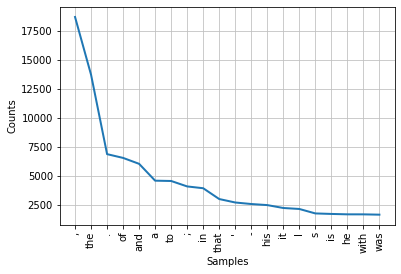

In [ ]:
fdist.plot(20) # grafica las distribuciones 

In [ ]:
fdist['monster']#numero de veces que una palabra se repite

49

## Distribuciones sobre contenido con filtro-fino

* Como vimos en la sección anterior, los tokens más frecuentes en un texto no son necesariamente las palabras que mas informacion nos arrojan sobre el contenido del mismo. 
* Por ello, es mejor filtrar y construir distribuciones de frecuencia que no consideren signos de puntuación o caracteres especiales

In [ ]:
long_words = [ palabra for palabra in text1 if len(palabra)>5] #tokens que tienen una longitud mayor a 5
vocabulario_filtrado = sorted(set(long_words))
vocabulario_filtrado[:10]

['ACCOUNT',
 'ADDITIONAL',
 'ADVANCING',
 'ADVENTURES',
 'AFFGHANISTAN',
 'AFRICA',
 'AGAINST',
 'ALFRED',
 'ALGERINE',
 'AMERICA']

Podemos ahora construir una lista de tuplas, basados en los conteos ya pre-calculados de la función `FreqDist`, así:

`fdist_filtrado = [('account', 2), ('additional', 32), ('advancing', 5), ...]`

Luego podemos convertir el objeto creado a formato de `np.array`de **Numpy** para poder hacer un sort por palabras mas frecuentes.

`fdist_filtrado = np.array(fdist_filtrado, *args)`

`np.sort(fdist_filtrado, *args) = [('account', 2), ('advancing', 5), ('additional', 32), ...]`

In [ ]:
palabras_interesantes = [(palabra,fdist[palabra]) for palabra in set(text1) if len(palabra)>5 and fdist[palabra]>10]
len(palabras_interesantes)

957

In [ ]:
dtypes = [('word', 'S10'), ('frequency', int)] #dtypes es un objeto que dice como numpy debe interpretar los datos la primera tupla es un string y el formato S10 y la segunda debe ser un entero por la frecuencia
palabras_interesantes = np.array(palabras_interesantes, dtype = dtypes)


In [ ]:
palabras_interesantes = np.sort(palabras_interesantes, order = 'frequency')
palabras_interesantes

<function matplotlib.pyplot.show(*args, **kw)>

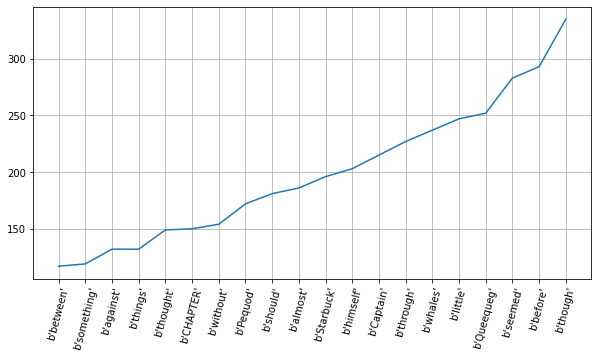

In [ ]:
top_words = 20
x = np.arange(len(palabras_interesantes[-top_words:]))
y = [freq[1] for freq in palabras_interesantes[-top_words:]]
plt.figure(figsize=(10,5))
plt.plot(x,y)#grafica dos variables
plt.xticks(x,[str(freq[0]) for freq in palabras_interesantes[-top_words:]], rotation=75)
plt.grid(True)
plt.show